#                                  Multi Label Clasification - 1D

# Load Data

In [1]:
import pandas as pd
import os

In [29]:

file_name = "diabetes_dataset"
root_folder = f'multi-label-clasification/one-d/{file_name}/' 
os.makedirs(root_folder, exist_ok=True)

df = pd.read_csv('sample_data/'+file_name+'.csv')

#buang kolom tidak dibutuhkan
df.drop(columns=['diagnosed_diabetes'], inplace=True)

print("Sebulum DROP nan : " + str(df.shape) )
df = df.dropna() #Drop Nan
print("Setelah DROP nan : " + str(df.shape) )

#gabungkan data karena data kurang banyak
# gestational -> Type 2
df["diabetes_stage"] = df["diabetes_stage"].str.replace(
    r"(?i)gestational", "Type 2", regex=True
)
# Tipe 1 -> Type 2
df["diabetes_stage"] = df["diabetes_stage"].str.replace(
    r"(?i)Type 1", "Type 2", regex=True
)

Sebulum DROP nan : (100000, 30)
Setelah DROP nan : (100000, 30)


In [30]:
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,239,41,160,145,136,236,6.36,8.18,29.6,Type 2
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,116,55,50,30,93,150,2.00,5.63,23.0,No Diabetes
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,213,66,99,36,118,195,5.07,7.51,44.7,Type 2
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,171,50,79,140,139,253,5.28,9.03,38.2,Type 2
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,210,52,125,160,137,184,12.74,7.20,23.5,Type 2


#### LabelEncoder

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#labeling
df['label_gender']            = le.fit_transform(df['gender'])
df['label_ethnicity']         = le.fit_transform(df['ethnicity'])
df['label_income_level']      = le.fit_transform(df['income_level'])
df['label_education_level']   = le.fit_transform(df['education_level'])
df['label_employment_status'] = le.fit_transform(df['employment_status'])
df['label_smoking_status']    = le.fit_transform(df['smoking_status'])

In [32]:
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,label_gender,label_ethnicity,label_income_level,label_education_level,label_employment_status,label_smoking_status
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,6.36,8.18,29.6,Type 2,1,0,2,1,0,2
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,2.00,5.63,23.0,No Diabetes,0,4,3,1,0,1
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,5.07,7.51,44.7,Type 2,1,2,3,1,3,2
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,5.28,9.03,38.2,Type 2,0,1,1,1,1,2
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,12.74,7.20,23.5,Type 2,1,4,3,0,1,2


#### Scaler

In [33]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Contoh: buat dan fit scaler
scaler = MinMaxScaler()
cols = [
    'label_gender', 
    'label_ethnicity', 
    'label_income_level',
    'label_education_level',
    'label_employment_status', 
    'label_smoking_status',
    #--------------------------
    'age',
    'physical_activity_minutes_per_week',
    'diet_score',
    'sleep_hours_per_day',
    'glucose_postprandial',
    'insulin_level',
    'hba1c',
    'diabetes_risk_score'
]

# Dictionary untuk menyimpan hasil transformasi
scaled_data = {}

# Loop untuk setiap kolom
for col in cols:
    scaler = MinMaxScaler()
    df[[col]] = scaler.fit_transform(df[[col]])  # scaling per kolom
    joblib.dump(scaler, os.path.join(root_folder, f'scaler_{col}.pkl'))
    scaled_data[col] = scaler
    print(f"✅ Scaler for '{col}' saved as scaler_{col}.pkl")

print("\nAll individual scalers saved successfully!")

✅ Scaler for 'label_gender' saved as scaler_label_gender.pkl
✅ Scaler for 'label_ethnicity' saved as scaler_label_ethnicity.pkl
✅ Scaler for 'label_income_level' saved as scaler_label_income_level.pkl
✅ Scaler for 'label_education_level' saved as scaler_label_education_level.pkl
✅ Scaler for 'label_employment_status' saved as scaler_label_employment_status.pkl
✅ Scaler for 'label_smoking_status' saved as scaler_label_smoking_status.pkl
✅ Scaler for 'age' saved as scaler_age.pkl
✅ Scaler for 'physical_activity_minutes_per_week' saved as scaler_physical_activity_minutes_per_week.pkl
✅ Scaler for 'diet_score' saved as scaler_diet_score.pkl
✅ Scaler for 'sleep_hours_per_day' saved as scaler_sleep_hours_per_day.pkl
✅ Scaler for 'glucose_postprandial' saved as scaler_glucose_postprandial.pkl
✅ Scaler for 'insulin_level' saved as scaler_insulin_level.pkl
✅ Scaler for 'hba1c' saved as scaler_hba1c.pkl
✅ Scaler for 'diabetes_risk_score' saved as scaler_diabetes_risk_score.pkl

All individual sc

In [34]:
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,label_gender,label_ethnicity,label_income_level,label_education_level,label_employment_status,label_smoking_status
0,0.555556,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,0.258103,0.57,...,0.144275,0.720690,0.417054,Type 2,0.5,0.00,0.50,0.333333,0.000000,1.0
1,0.416667,Female,White,Highschool,Middle,Employed,Former,1,0.171669,0.67,...,0.000000,0.281034,0.314729,No Diabetes,0.0,1.00,0.75,0.333333,0.000000,0.5
2,0.583333,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,0.068427,0.64,...,0.101588,0.605172,0.651163,Type 2,0.5,0.50,0.75,0.333333,1.000000,1.0
3,0.777778,Female,Black,Highschool,Low,Retired,Never,0,0.058824,0.34,...,0.108537,0.867241,0.550388,Type 2,0.0,0.25,0.25,0.333333,0.333333,1.0
4,0.388889,Male,White,Graduate,Middle,Retired,Never,1,0.130852,0.72,...,0.355394,0.551724,0.322481,Type 2,0.5,1.00,0.75,0.000000,0.333333,1.0


#### Mapping label

In [35]:
import json
mapping_dicts = {}

cols = [
    'gender',
    'ethnicity',
    'education_level',
    'income_level',
    'employment_status',
    'smoking_status'
]

for col in cols:
    label_col = f"label_{col}"
    mapping_dicts[col] = dict(zip(df[col], df[label_col]))


with open(root_folder + 'label_mappings.json', 'w') as f:
    json.dump(mapping_dicts, f, indent=2)

rows = []
for col, mapping in mapping_dicts.items():
    for k, v in mapping.items():
        rows.append({'feature': col, 'original_value': k, 'label_value': v})

mapping_table = pd.DataFrame(rows)
print(mapping_table)

              feature original_value  label_value
0              gender           Male     0.500000
1              gender         Female     0.000000
2              gender          Other     1.000000
3           ethnicity          Asian     0.000000
4           ethnicity          White     1.000000
5           ethnicity       Hispanic     0.500000
6           ethnicity          Black     0.250000
7           ethnicity          Other     0.750000
8     education_level     Highschool     0.333333
9     education_level       Graduate     0.000000
10    education_level   Postgraduate     1.000000
11    education_level      No formal     0.666667
12       income_level   Lower-Middle     0.500000
13       income_level         Middle     0.750000
14       income_level            Low     0.250000
15       income_level   Upper-Middle     1.000000
16       income_level           High     0.000000
17  employment_status       Employed     0.000000
18  employment_status     Unemployed     1.000000


#### Select Kolom To Trian

In [36]:
col_target = 'diabetes_stage'
cols = [
    'label_gender', 
    #'label_ethnicity', 
    #'label_income_level',
    #'label_education_level',
    #'label_employment_status', 
    #'label_smoking_status',
    #--------------------------
    'age',
    'physical_activity_minutes_per_week',
    #'diet_score',
    #'sleep_hours_per_day',
    'glucose_postprandial',
    'insulin_level',
    'hba1c',
    #'diabetes_risk_score',
    #------------------------
    col_target
]
df = df[cols].copy()

In [37]:
df.head()

,label_gender,age,physical_activity_minutes_per_week,glucose_postprandial,insulin_level,hba1c,diabetes_stage
0,0.5,0.555556,0.258103,0.764977,0.144275,0.720690,Type 2
1,0.0,0.416667,0.171669,0.368664,0.000000,0.281034,No Diabetes
2,0.5,0.583333,0.068427,0.576037,0.101588,0.605172,Type 2
3,0.0,0.777778,0.058824,0.843318,0.108537,0.867241,Type 2
4,0.5,0.388889,0.130852,0.525346,0.355394,0.551724,Type 2


#### cek keseimbangan data

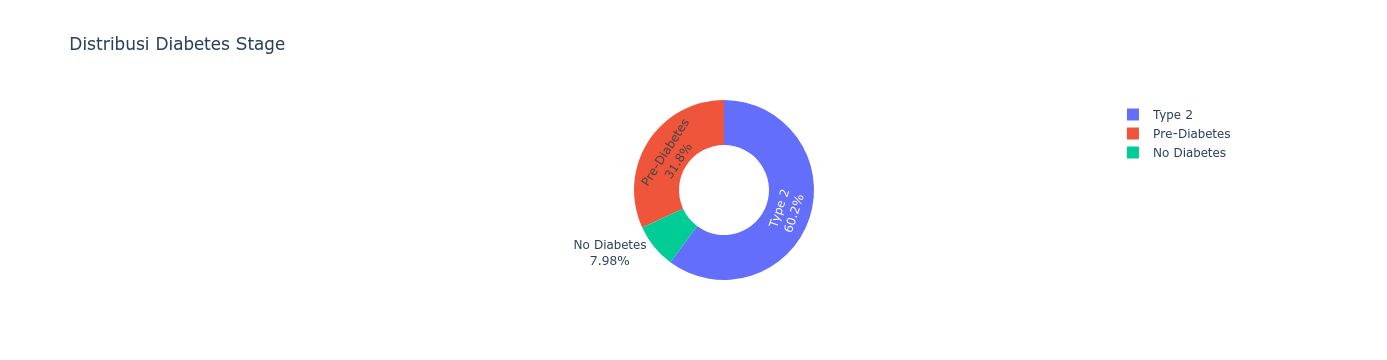

In [38]:
import plotly.express as px

fig = px.pie(
    df,
    names=col_target,
    hole=0.5,  # membuatnya jadi donat
    title='Distribusi Diabetes Stage',
)
fig.update_traces(textinfo='percent+label')
fig.show()

#### Tentukan target -> one-hot encoding

In [39]:
y_counts = df[col_target].value_counts(normalize=True)
labels = list(y_counts.index)

df_y_encoded = pd.get_dummies(df[col_target], prefix='y')

# Pastikan semua nama kolom lowercase dan spasi → underscore
df_y_encoded.columns = (
    df_y_encoded.columns.str.lower()
                        .str.replace(' ', '_')
)

# Gabungkan ke DataFrame utama
df = pd.concat([df.drop(col_target, axis=1), df_y_encoded.astype(int)], axis=1)

In [40]:
df.head()

,label_gender,age,physical_activity_minutes_per_week,glucose_postprandial,insulin_level,hba1c,y_no_diabetes,y_pre-diabetes,y_type_2
0,0.5,0.555556,0.258103,0.764977,0.144275,0.720690,0,0,1
1,0.0,0.416667,0.171669,0.368664,0.000000,0.281034,1,0,0
2,0.5,0.583333,0.068427,0.576037,0.101588,0.605172,0,0,1
3,0.0,0.777778,0.058824,0.843318,0.108537,0.867241,0,0,1
4,0.5,0.388889,0.130852,0.525346,0.355394,0.551724,0,0,1


# Data Load To Train

#### Split data

In [41]:
import torch
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Misal df sudah berisi semua data
# Pisahkan fitur dan target
feature_cols = [col for col in df.columns if not col.startswith('y_')]
target_cols = [col for col in df.columns if col.startswith('y_')]

# Pisahkan train-test (stratify opsional jika masih punya kolom 'diabetes_stage')
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)


#### DataLoader

In [42]:
from data_set import MultiLabel1DDataset

# Buat dataset dengan class kamu
train_dataset = MultiLabel1DDataset(X_train, feature_cols, target_cols, normalize=False)
test_dataset  = MultiLabel1DDataset(X_test, feature_cols, target_cols, normalize=False)

# Buat DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Cek contoh batch
for X, y in train_loader:
    print("X shape:", X.shape)
    print("y shape:", y.shape)
    print(X[:3])  # contoh fitur
    print(y[:3])  # contoh label
    break

X shape: torch.Size([32, 6])
y shape: torch.Size([32, 3])
tensor([[0.0000, 0.6111, 0.1417, 0.3502, 0.4057, 0.3810],
        [0.0000, 0.5694, 0.0660, 0.6636, 0.0000, 0.6690],
        [0.5000, 0.7222, 0.0888, 0.3687, 0.2234, 0.4052]])
tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.]])


# Config

In [77]:
from jcopdl.callback import Callback, set_config

config = set_config({
    "labels"         : labels,
    "threshold"      : 0.5,
    "input_dim"      : len(test_dataset.X[0]),
    "hidden_dims"    : [64],
    "output_dim"     : len(labels),
    "dropout"        : 0.1,
    "activation"     : "relu",
    "early_stop_patience" : 30,
    "col_target"     : col_target,
    "feature_cols"   : feature_cols
})
config

Config(activation=relu, col_target=diabetes_stage, dropout=0.1, early_stop_patience=30, feature_cols=['label_gender', 'age', 'physical_activity_minutes_per_week', 'glucose_postprandial', 'insulin_level', 'hba1c'], hidden_dims=[64], input_dim=6, labels=['Type 2', 'Pre-Diabetes', 'No Diabetes'], output_dim=3, threshold=0.5)

# MCOC

#### Model - Criterion - Optimizer - Callback

In [78]:
from class_lib import MultiLabel1DClassifier
from torch import optim, nn
from jcopdl.callback import Callback

#Model
model = MultiLabel1DClassifier(input_dim=config.input_dim, hidden_dims=config.hidden_dims, output_dim=config.output_dim, dropout=config.dropout, activation=config.activation).to(device)

#Criterion
criterion = nn.BCELoss()

#Optimizer
optim = optim.AdamW(model.parameters(), lr=0.001)

#Callback
callback = Callback(model, config, outdir=root_folder,early_stop_patience=config.early_stop_patience)

#### Visualisasi Model

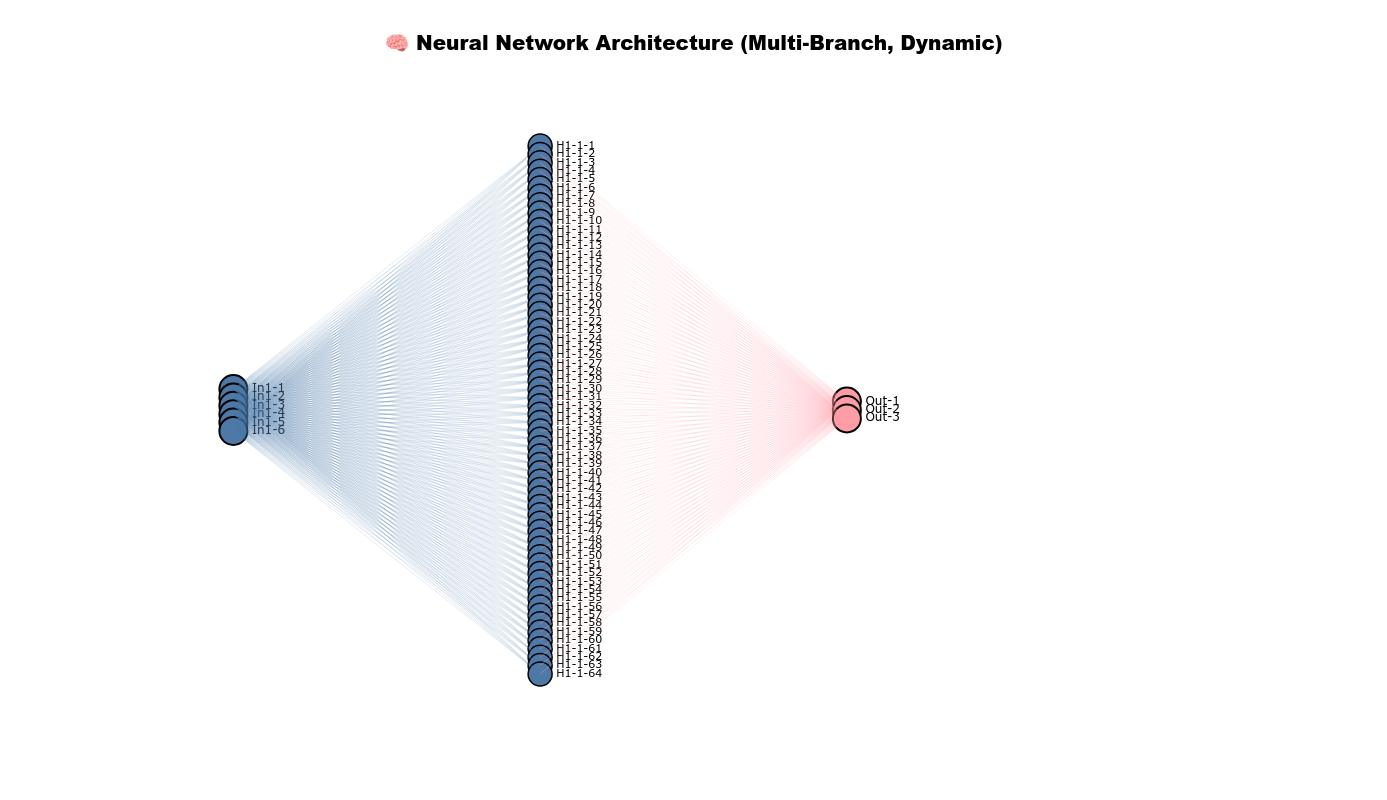

In [79]:
from visualization import plot_dynamic_multi_input_network
plot_dynamic_multi_input_network(
    input_dims=[config.input_dim],
    hidden_dims_per_branch=[
        config.hidden_dims
    ],
    combined_dims=None,
    output_dim=config.output_dim,
    figsize=(1000, 800)
)


# Training


─────────────────────────────────────────────────── 🚀 EPOCH 1 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3164.52it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.3613 │ 0.3025 │ │    Type 2    │  0.9364  │
│ Hamming Loss     │ 0.1931 │ 0.1556 │ │ Pre-Diabetes │  0.7402  │
│ Subset Accuracy  │ 0.6399 │ 0.7162 │ │ No Diabetes  │  0.8567  │
│ Micro F1         │ 0.6950 │ 0.7629 │ └──────────────┴──────────┘
│ Macro F1         │ 0.5170 │ 0.6491 │                            
│ Overall Accuracy │ 0.8069 │ 0.8444 │                            
└──────────────────┴────────┴────────┘


Epoch     1
Train_cost  = 0.3613 | Test_cost  = 0.3025 | Train_score = 0.8069 | Test_score = 0.8444 |


─────────────────────────────────────────────────── 🚀 EPOCH 2 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3333.69it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2811 │ 0.2618 │ │    Type 2    │  0.9379  │
│ Hamming Loss     │ 0.1359 │ 0.1201 │ │ Pre-Diabetes │  0.8281  │
│ Subset Accuracy  │ 0.7700 │ 0.8063 │ │ No Diabetes  │  0.8738  │
│ Micro F1         │ 0.7968 │ 0.8193 │ └──────────────┴──────────┘
│ Macro F1         │ 0.6905 │ 0.7129 │                            
│ Overall Accuracy │ 0.8641 │ 0.8799 │                            
└──────────────────┴────────┴────────┘


Epoch     2
Train_cost  = 0.2811 | Test_cost  = 0.2618 | Train_score = 0.8641 | Test_score = 0.8799 |


─────────────────────────────────────────────────── 🚀 EPOCH 3 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3400.59it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2519 │ 0.2425 │ │    Type 2    │  0.9386  │
│ Hamming Loss     │ 0.1148 │ 0.1094 │ │ Pre-Diabetes │  0.8491  │
│ Subset Accuracy  │ 0.8060 │ 0.8136 │ │ No Diabetes  │  0.8841  │
│ Micro F1         │ 0.8257 │ 0.8339 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7274 │ 0.7339 │                            
│ Overall Accuracy │ 0.8852 │ 0.8906 │                            
└──────────────────┴────────┴────────┘


Epoch     3
Train_cost  = 0.2519 | Test_cost  = 0.2425 | Train_score = 0.8852 | Test_score = 0.8906 |


─────────────────────────────────────────────────── 🚀 EPOCH 4 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3325.78it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2373 │ 0.2318 │ │    Type 2    │  0.9413  │
│ Hamming Loss     │ 0.1079 │ 0.1032 │ │ Pre-Diabetes │  0.8593  │
│ Subset Accuracy  │ 0.8125 │ 0.8205 │ │ No Diabetes  │  0.8899  │
│ Micro F1         │ 0.8352 │ 0.8422 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7419 │ 0.7591 │                            
│ Overall Accuracy │ 0.8921 │ 0.8968 │                            
└──────────────────┴────────┴────────┘


Epoch     4
Train_cost  = 0.2373 | Test_cost  = 0.2318 | Train_score = 0.8921 | Test_score = 0.8968 |


─────────────────────────────────────────────────── 🚀 EPOCH 5 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3488.42it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2282 │ 0.2257 │ │    Type 2    │  0.9416  │
│ Hamming Loss     │ 0.1032 │ 0.0978 │ │ Pre-Diabetes │  0.8676  │
│ Subset Accuracy  │ 0.8201 │ 0.8256 │ │ No Diabetes  │  0.8973  │
│ Micro F1         │ 0.8422 │ 0.8505 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7543 │ 0.7660 │                            
│ Overall Accuracy │ 0.8968 │ 0.9022 │                            
└──────────────────┴────────┴────────┘


Epoch     5
Train_cost  = 0.2282 | Test_cost  = 0.2257 | Train_score = 0.8968 | Test_score = 0.9022 |


─────────────────────────────────────────────────── 🚀 EPOCH 6 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3458.97it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2226 │ 0.2204 │ │    Type 2    │  0.9436  │
│ Hamming Loss     │ 0.1003 │ 0.1003 │ │ Pre-Diabetes │  0.8633  │
│ Subset Accuracy  │ 0.8267 │ 0.8276 │ │ No Diabetes  │  0.8921  │
│ Micro F1         │ 0.8469 │ 0.8468 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7633 │ 0.7724 │                            
│ Overall Accuracy │ 0.8997 │ 0.8997 │                            
└──────────────────┴────────┴────────┘


Epoch     6
Train_cost  = 0.2226 | Test_cost  = 0.2204 | Train_score = 0.8997 | Test_score = 0.8997 |
==> EarlyStop patience =  1 | Best test_score: 0.9022


─────────────────────────────────────────────────── 🚀 EPOCH 7 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3473.07it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2183 │ 0.2171 │ │    Type 2    │  0.9428  │
│ Hamming Loss     │ 0.0986 │ 0.0970 │ │ Pre-Diabetes │  0.8675  │
│ Subset Accuracy  │ 0.8303 │ 0.8377 │ │ No Diabetes  │  0.8985  │
│ Micro F1         │ 0.8495 │ 0.8526 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7691 │ 0.7739 │                            
│ Overall Accuracy │ 0.9014 │ 0.9030 │                            
└──────────────────┴────────┴────────┘


Epoch     7
Train_cost  = 0.2183 | Test_cost  = 0.2171 | Train_score = 0.9014 | Test_score = 0.9030 |


─────────────────────────────────────────────────── 🚀 EPOCH 8 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3469.96it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2156 │ 0.2167 │ │    Type 2    │  0.9428  │
│ Hamming Loss     │ 0.0976 │ 0.0930 │ │ Pre-Diabetes │  0.8738  │
│ Subset Accuracy  │ 0.8339 │ 0.8439 │ │ No Diabetes  │  0.9045  │
│ Micro F1         │ 0.8512 │ 0.8587 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7725 │ 0.7826 │                            
│ Overall Accuracy │ 0.9024 │ 0.9071 │                            
└──────────────────┴────────┴────────┘


Epoch     8
Train_cost  = 0.2156 | Test_cost  = 0.2167 | Train_score = 0.9024 | Test_score = 0.9071 |


─────────────────────────────────────────────────── 🚀 EPOCH 9 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3477.70it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2136 │ 0.2141 │ │    Type 2    │  0.9435  │
│ Hamming Loss     │ 0.0964 │ 0.0998 │ │ Pre-Diabetes │  0.8637  │
│ Subset Accuracy  │ 0.8364 │ 0.8348 │ │ No Diabetes  │  0.8935  │
│ Micro F1         │ 0.8532 │ 0.8483 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7776 │ 0.7764 │                            
│ Overall Accuracy │ 0.9036 │ 0.9002 │                            
└──────────────────┴────────┴────────┘


Epoch     9
Train_cost  = 0.2136 | Test_cost  = 0.2141 | Train_score = 0.9036 | Test_score = 0.9002 |
==> EarlyStop patience =  1 | Best test_score: 0.9071


─────────────────────────────────────────────────── 🚀 EPOCH 10 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3370.12it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2122 │ 0.2121 │ │    Type 2    │  0.9435  │
│ Hamming Loss     │ 0.0961 │ 0.0938 │ │ Pre-Diabetes │  0.8740  │
│ Subset Accuracy  │ 0.8377 │ 0.8410 │ │ No Diabetes  │  0.9010  │
│ Micro F1         │ 0.8538 │ 0.8570 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7798 │ 0.7876 │                            
│ Overall Accuracy │ 0.9039 │ 0.9062 │                            
└──────────────────┴────────┴────────┘


Epoch    10
Train_cost  = 0.2122 | Test_cost  = 0.2121 | Train_score = 0.9039 | Test_score = 0.9062 |
==> EarlyStop patience =  2 | Best test_score: 0.9071


─────────────────────────────────────────────────── 🚀 EPOCH 11 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3595.36it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2113 │ 0.2122 │ │    Type 2    │  0.9437  │
│ Hamming Loss     │ 0.0957 │ 0.0938 │ │ Pre-Diabetes │  0.8741  │
│ Subset Accuracy  │ 0.8378 │ 0.8347 │ │ No Diabetes  │  0.9006  │
│ Micro F1         │ 0.8544 │ 0.8564 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7802 │ 0.7813 │                            
│ Overall Accuracy │ 0.9043 │ 0.9062 │                            
└──────────────────┴────────┴────────┘


Epoch    11
Train_cost  = 0.2113 | Test_cost  = 0.2122 | Train_score = 0.9043 | Test_score = 0.9062 |
==> EarlyStop patience =  3 | Best test_score: 0.9071


─────────────────────────────────────────────────── 🚀 EPOCH 12 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3457.15it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2104 │ 0.2116 │ │    Type 2    │  0.9432  │
│ Hamming Loss     │ 0.0949 │ 0.0962 │ │ Pre-Diabetes │  0.8703  │
│ Subset Accuracy  │ 0.8398 │ 0.8373 │ │ No Diabetes  │  0.8980  │
│ Micro F1         │ 0.8556 │ 0.8531 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7821 │ 0.7888 │                            
│ Overall Accuracy │ 0.9051 │ 0.9038 │                            
└──────────────────┴────────┴────────┘


Epoch    12
Train_cost  = 0.2104 | Test_cost  = 0.2116 | Train_score = 0.9051 | Test_score = 0.9038 |
==> EarlyStop patience =  4 | Best test_score: 0.9071


─────────────────────────────────────────────────── 🚀 EPOCH 13 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3521.21it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2099 │ 0.2106 │ │    Type 2    │  0.9437  │
│ Hamming Loss     │ 0.0946 │ 0.0958 │ │ Pre-Diabetes │  0.8708  │
│ Subset Accuracy  │ 0.8401 │ 0.8378 │ │ No Diabetes  │  0.8982  │
│ Micro F1         │ 0.8560 │ 0.8540 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7845 │ 0.7827 │                            
│ Overall Accuracy │ 0.9054 │ 0.9042 │                            
└──────────────────┴────────┴────────┘


Epoch    13
Train_cost  = 0.2099 | Test_cost  = 0.2106 | Train_score = 0.9054 | Test_score = 0.9042 |
==> EarlyStop patience =  5 | Best test_score: 0.9071


─────────────────────────────────────────────────── 🚀 EPOCH 14 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3415.28it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2093 │ 0.2099 │ │    Type 2    │  0.9437  │
│ Hamming Loss     │ 0.0947 │ 0.0947 │ │ Pre-Diabetes │  0.8718  │
│ Subset Accuracy  │ 0.8405 │ 0.8428 │ │ No Diabetes  │  0.9003  │
│ Micro F1         │ 0.8560 │ 0.8559 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7847 │ 0.7900 │                            
│ Overall Accuracy │ 0.9053 │ 0.9053 │                            
└──────────────────┴────────┴────────┘


Epoch    14
Train_cost  = 0.2093 | Test_cost  = 0.2099 | Train_score = 0.9053 | Test_score = 0.9053 |
==> EarlyStop patience =  6 | Best test_score: 0.9071


─────────────────────────────────────────────────── 🚀 EPOCH 15 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3560.05it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2092 │ 0.2097 │ │    Type 2    │  0.9418  │
│ Hamming Loss     │ 0.0943 │ 0.0946 │ │ Pre-Diabetes │  0.8736  │
│ Subset Accuracy  │ 0.8408 │ 0.8417 │ │ No Diabetes  │  0.9006  │
│ Micro F1         │ 0.8567 │ 0.8558 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7851 │ 0.7917 │                            
│ Overall Accuracy │ 0.9057 │ 0.9054 │                            
└──────────────────┴────────┴────────┘


Epoch    15
Train_cost  = 0.2092 | Test_cost  = 0.2097 | Train_score = 0.9057 | Test_score = 0.9054 |
==> EarlyStop patience =  7 | Best test_score: 0.9071


─────────────────────────────────────────────────── 🚀 EPOCH 16 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3515.87it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2088 │ 0.2151 │ │    Type 2    │  0.9438  │
│ Hamming Loss     │ 0.0941 │ 0.1007 │ │ Pre-Diabetes │  0.8627  │
│ Subset Accuracy  │ 0.8414 │ 0.8358 │ │ No Diabetes  │  0.8915  │
│ Micro F1         │ 0.8569 │ 0.8473 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7863 │ 0.7861 │                            
│ Overall Accuracy │ 0.9059 │ 0.8993 │                            
└──────────────────┴────────┴────────┘


Epoch    16
Train_cost  = 0.2088 | Test_cost  = 0.2151 | Train_score = 0.9059 | Test_score = 0.8993 |
==> EarlyStop patience =  8 | Best test_score: 0.9071


─────────────────────────────────────────────────── 🚀 EPOCH 17 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3567.24it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2084 │ 0.2151 │ │    Type 2    │  0.9434  │
│ Hamming Loss     │ 0.0944 │ 0.0958 │ │ Pre-Diabetes │  0.8676  │
│ Subset Accuracy  │ 0.8412 │ 0.8423 │ │ No Diabetes  │  0.9017  │
│ Micro F1         │ 0.8565 │ 0.8550 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7855 │ 0.7837 │                            
│ Overall Accuracy │ 0.9056 │ 0.9042 │                            
└──────────────────┴────────┴────────┘


Epoch    17
Train_cost  = 0.2084 | Test_cost  = 0.2151 | Train_score = 0.9056 | Test_score = 0.9042 |
==> EarlyStop patience =  9 | Best test_score: 0.9071


─────────────────────────────────────────────────── 🚀 EPOCH 18 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3551.30it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2084 │ 0.2099 │ │    Type 2    │  0.9441  │
│ Hamming Loss     │ 0.0941 │ 0.0910 │ │ Pre-Diabetes │  0.8774  │
│ Subset Accuracy  │ 0.8423 │ 0.8456 │ │ No Diabetes  │  0.9056  │
│ Micro F1         │ 0.8570 │ 0.8615 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7859 │ 0.7909 │                            
│ Overall Accuracy │ 0.9059 │ 0.9091 │                            
└──────────────────┴────────┴────────┘


Epoch    18
Train_cost  = 0.2084 | Test_cost  = 0.2099 | Train_score = 0.9059 | Test_score = 0.9091 |


─────────────────────────────────────────────────── 🚀 EPOCH 19 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3511.12it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2084 │ 0.2094 │ │    Type 2    │  0.9435  │
│ Hamming Loss     │ 0.0946 │ 0.0932 │ │ Pre-Diabetes │  0.8727  │
│ Subset Accuracy  │ 0.8408 │ 0.8465 │ │ No Diabetes  │  0.9041  │
│ Micro F1         │ 0.8562 │ 0.8589 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7842 │ 0.7819 │                            
│ Overall Accuracy │ 0.9054 │ 0.9068 │                            
└──────────────────┴────────┴────────┘


Epoch    19
Train_cost  = 0.2084 | Test_cost  = 0.2094 | Train_score = 0.9054 | Test_score = 0.9068 |
==> EarlyStop patience =  1 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 20 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3565.15it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2083 │ 0.2085 │ │    Type 2    │  0.9434  │
│ Hamming Loss     │ 0.0944 │ 0.0924 │ │ Pre-Diabetes │  0.8760  │
│ Subset Accuracy  │ 0.8416 │ 0.8397 │ │ No Diabetes  │  0.9035  │
│ Micro F1         │ 0.8565 │ 0.8587 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7858 │ 0.7810 │                            
│ Overall Accuracy │ 0.9056 │ 0.9076 │                            
└──────────────────┴────────┴────────┘


Epoch    20
Train_cost  = 0.2083 | Test_cost  = 0.2085 | Train_score = 0.9056 | Test_score = 0.9076 |


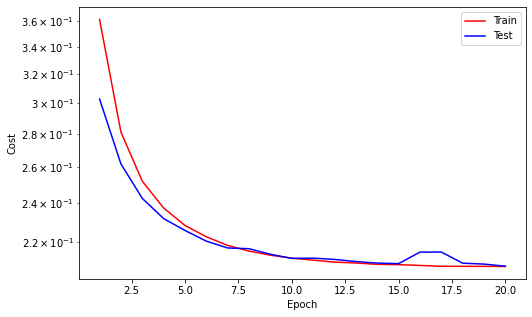

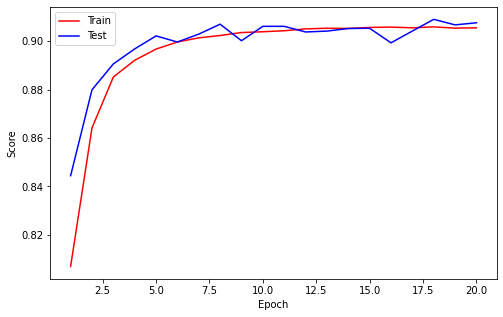

==> EarlyStop patience =  2 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 21 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3561.93it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2079 │ 0.2082 │ │    Type 2    │  0.9439  │
│ Hamming Loss     │ 0.0939 │ 0.0938 │ │ Pre-Diabetes │  0.8724  │
│ Subset Accuracy  │ 0.8421 │ 0.8440 │ │ No Diabetes  │  0.9022  │
│ Micro F1         │ 0.8573 │ 0.8576 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7864 │ 0.7839 │                            
│ Overall Accuracy │ 0.9061 │ 0.9062 │                            
└──────────────────┴────────┴────────┘


Epoch    21
Train_cost  = 0.2079 | Test_cost  = 0.2082 | Train_score = 0.9061 | Test_score = 0.9062 |
==> EarlyStop patience =  3 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 22 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3650.91it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2080 │ 0.2088 │ │    Type 2    │  0.9434  │
│ Hamming Loss     │ 0.0940 │ 0.0922 │ │ Pre-Diabetes │  0.8760  │
│ Subset Accuracy  │ 0.8423 │ 0.8391 │ │ No Diabetes  │  0.9040  │
│ Micro F1         │ 0.8573 │ 0.8590 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7872 │ 0.7729 │                            
│ Overall Accuracy │ 0.9060 │ 0.9078 │                            
└──────────────────┴────────┴────────┘


Epoch    22
Train_cost  = 0.2080 | Test_cost  = 0.2088 | Train_score = 0.9060 | Test_score = 0.9078 |
==> EarlyStop patience =  4 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 23 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3502.54it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2080 │ 0.2089 │ │    Type 2    │  0.9440  │
│ Hamming Loss     │ 0.0942 │ 0.0958 │ │ Pre-Diabetes │  0.8694  │
│ Subset Accuracy  │ 0.8414 │ 0.8429 │ │ No Diabetes  │  0.8991  │
│ Micro F1         │ 0.8568 │ 0.8550 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7858 │ 0.7916 │                            
│ Overall Accuracy │ 0.9058 │ 0.9042 │                            
└──────────────────┴────────┴────────┘


Epoch    23
Train_cost  = 0.2080 | Test_cost  = 0.2089 | Train_score = 0.9058 | Test_score = 0.9042 |
==> EarlyStop patience =  5 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 24 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3540.64it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2077 │ 0.2094 │ │    Type 2    │  0.9435  │
│ Hamming Loss     │ 0.0940 │ 0.0967 │ │ Pre-Diabetes │  0.8693  │
│ Subset Accuracy  │ 0.8424 │ 0.8417 │ │ No Diabetes  │  0.8971  │
│ Micro F1         │ 0.8572 │ 0.8533 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7872 │ 0.7918 │                            
│ Overall Accuracy │ 0.9060 │ 0.9033 │                            
└──────────────────┴────────┴────────┘


Epoch    24
Train_cost  = 0.2077 | Test_cost  = 0.2094 | Train_score = 0.9060 | Test_score = 0.9033 |
==> EarlyStop patience =  6 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 25 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3577.29it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2077 │ 0.2115 │ │    Type 2    │  0.9435  │
│ Hamming Loss     │ 0.0943 │ 0.0934 │ │ Pre-Diabetes │  0.8718  │
│ Subset Accuracy  │ 0.8419 │ 0.8432 │ │ No Diabetes  │  0.9046  │
│ Micro F1         │ 0.8567 │ 0.8579 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7863 │ 0.7791 │                            
│ Overall Accuracy │ 0.9057 │ 0.9066 │                            
└──────────────────┴────────┴────────┘


Epoch    25
Train_cost  = 0.2077 | Test_cost  = 0.2115 | Train_score = 0.9057 | Test_score = 0.9066 |
==> EarlyStop patience =  7 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 26 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3627.99it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2078 │ 0.2082 │ │    Type 2    │  0.9435  │
│ Hamming Loss     │ 0.0942 │ 0.0943 │ │ Pre-Diabetes │  0.8730  │
│ Subset Accuracy  │ 0.8414 │ 0.8377 │ │ No Diabetes  │  0.9004  │
│ Micro F1         │ 0.8568 │ 0.8556 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7853 │ 0.7813 │                            
│ Overall Accuracy │ 0.9058 │ 0.9057 │                            
└──────────────────┴────────┴────────┘


Epoch    26
Train_cost  = 0.2078 | Test_cost  = 0.2082 | Train_score = 0.9058 | Test_score = 0.9057 |
==> EarlyStop patience =  8 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 27 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3650.68it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2074 │ 0.2099 │ │    Type 2    │  0.9431  │
│ Hamming Loss     │ 0.0938 │ 0.0935 │ │ Pre-Diabetes │  0.8711  │
│ Subset Accuracy  │ 0.8414 │ 0.8449 │ │ No Diabetes  │  0.9053  │
│ Micro F1         │ 0.8574 │ 0.8581 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7864 │ 0.7736 │                            
│ Overall Accuracy │ 0.9062 │ 0.9065 │                            
└──────────────────┴────────┴────────┘


Epoch    27
Train_cost  = 0.2074 | Test_cost  = 0.2099 | Train_score = 0.9062 | Test_score = 0.9065 |
==> EarlyStop patience =  9 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 28 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3521.83it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2075 │ 0.2093 │ │    Type 2    │  0.9436  │
│ Hamming Loss     │ 0.0938 │ 0.0923 │ │ Pre-Diabetes │  0.8733  │
│ Subset Accuracy  │ 0.8424 │ 0.8494 │ │ No Diabetes  │  0.9061  │
│ Micro F1         │ 0.8575 │ 0.8611 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7871 │ 0.7937 │                            
│ Overall Accuracy │ 0.9062 │ 0.9077 │                            
└──────────────────┴────────┴────────┘


Epoch    28
Train_cost  = 0.2075 | Test_cost  = 0.2093 | Train_score = 0.9062 | Test_score = 0.9077 |
==> EarlyStop patience = 10 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 29 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3601.91it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2075 │ 0.2083 │ │    Type 2    │  0.9434  │
│ Hamming Loss     │ 0.0939 │ 0.0955 │ │ Pre-Diabetes │  0.8688  │
│ Subset Accuracy  │ 0.8421 │ 0.8397 │ │ No Diabetes  │  0.9012  │
│ Micro F1         │ 0.8573 │ 0.8549 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7882 │ 0.7714 │                            
│ Overall Accuracy │ 0.9061 │ 0.9044 │                            
└──────────────────┴────────┴────────┘


Epoch    29
Train_cost  = 0.2075 | Test_cost  = 0.2083 | Train_score = 0.9061 | Test_score = 0.9044 |
==> EarlyStop patience = 11 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 30 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3594.92it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2075 │ 0.2086 │ │    Type 2    │  0.9432  │
│ Hamming Loss     │ 0.0937 │ 0.0948 │ │ Pre-Diabetes │  0.8733  │
│ Subset Accuracy  │ 0.8421 │ 0.8380 │ │ No Diabetes  │  0.8992  │
│ Micro F1         │ 0.8575 │ 0.8554 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7864 │ 0.7903 │                            
│ Overall Accuracy │ 0.9063 │ 0.9052 │                            
└──────────────────┴────────┴────────┘


Epoch    30
Train_cost  = 0.2075 | Test_cost  = 0.2086 | Train_score = 0.9063 | Test_score = 0.9052 |
==> EarlyStop patience = 12 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 31 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3537.15it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2077 │ 0.2113 │ │    Type 2    │  0.9432  │
│ Hamming Loss     │ 0.0938 │ 0.0969 │ │ Pre-Diabetes │  0.8701  │
│ Subset Accuracy  │ 0.8422 │ 0.8322 │ │ No Diabetes  │  0.8960  │
│ Micro F1         │ 0.8574 │ 0.8515 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7879 │ 0.7906 │                            
│ Overall Accuracy │ 0.9062 │ 0.9031 │                            
└──────────────────┴────────┴────────┘


Epoch    31
Train_cost  = 0.2077 | Test_cost  = 0.2113 | Train_score = 0.9062 | Test_score = 0.9031 |
==> EarlyStop patience = 13 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 32 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3600.68it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2073 │ 0.2085 │ │    Type 2    │  0.9435  │
│ Hamming Loss     │ 0.0940 │ 0.0914 │ │ Pre-Diabetes │  0.8772  │
│ Subset Accuracy  │ 0.8420 │ 0.8449 │ │ No Diabetes  │  0.9052  │
│ Micro F1         │ 0.8571 │ 0.8609 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7863 │ 0.7915 │                            
│ Overall Accuracy │ 0.9060 │ 0.9086 │                            
└──────────────────┴────────┴────────┘


Epoch    32
Train_cost  = 0.2073 | Test_cost  = 0.2085 | Train_score = 0.9060 | Test_score = 0.9086 |
==> EarlyStop patience = 14 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 33 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3581.31it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2076 │ 0.2083 │ │    Type 2    │  0.9431  │
│ Hamming Loss     │ 0.0939 │ 0.0938 │ │ Pre-Diabetes │  0.8728  │
│ Subset Accuracy  │ 0.8419 │ 0.8449 │ │ No Diabetes  │  0.9027  │
│ Micro F1         │ 0.8574 │ 0.8579 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7880 │ 0.7832 │                            
│ Overall Accuracy │ 0.9061 │ 0.9062 │                            
└──────────────────┴────────┴────────┘


Epoch    33
Train_cost  = 0.2076 | Test_cost  = 0.2083 | Train_score = 0.9061 | Test_score = 0.9062 |
==> EarlyStop patience = 15 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 34 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3521.09it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2079 │ 0.2110 │ │    Type 2    │  0.9433  │
│ Hamming Loss     │ 0.0941 │ 0.0930 │ │ Pre-Diabetes │  0.8735  │
│ Subset Accuracy  │ 0.8421 │ 0.8472 │ │ No Diabetes  │  0.9042  │
│ Micro F1         │ 0.8570 │ 0.8592 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7875 │ 0.7953 │                            
│ Overall Accuracy │ 0.9059 │ 0.9070 │                            
└──────────────────┴────────┴────────┘


Epoch    34
Train_cost  = 0.2079 | Test_cost  = 0.2110 | Train_score = 0.9059 | Test_score = 0.9070 |
==> EarlyStop patience = 16 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 35 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3337.96it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2078 │ 0.2076 │ │    Type 2    │  0.9433  │
│ Hamming Loss     │ 0.0938 │ 0.0941 │ │ Pre-Diabetes │  0.8721  │
│ Subset Accuracy  │ 0.8423 │ 0.8421 │ │ No Diabetes  │  0.9023  │
│ Micro F1         │ 0.8575 │ 0.8568 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7873 │ 0.7816 │                            
│ Overall Accuracy │ 0.9062 │ 0.9059 │                            
└──────────────────┴────────┴────────┘


Epoch    35
Train_cost  = 0.2078 | Test_cost  = 0.2076 | Train_score = 0.9062 | Test_score = 0.9059 |
==> EarlyStop patience = 17 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 36 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3652.63it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2078 │ 0.2092 │ │    Type 2    │  0.9434  │
│ Hamming Loss     │ 0.0942 │ 0.0970 │ │ Pre-Diabetes │  0.8684  │
│ Subset Accuracy  │ 0.8412 │ 0.8343 │ │ No Diabetes  │  0.8973  │
│ Micro F1         │ 0.8568 │ 0.8519 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7857 │ 0.7746 │                            
│ Overall Accuracy │ 0.9058 │ 0.9030 │                            
└──────────────────┴────────┴────────┘


Epoch    36
Train_cost  = 0.2078 | Test_cost  = 0.2092 | Train_score = 0.9058 | Test_score = 0.9030 |
==> EarlyStop patience = 18 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 37 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3576.16it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2077 │ 0.2079 │ │    Type 2    │  0.9434  │
│ Hamming Loss     │ 0.0940 │ 0.0938 │ │ Pre-Diabetes │  0.8733  │
│ Subset Accuracy  │ 0.8411 │ 0.8409 │ │ No Diabetes  │  0.9020  │
│ Micro F1         │ 0.8570 │ 0.8570 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7864 │ 0.7819 │                            
│ Overall Accuracy │ 0.9060 │ 0.9062 │                            
└──────────────────┴────────┴────────┘


Epoch    37
Train_cost  = 0.2077 | Test_cost  = 0.2079 | Train_score = 0.9060 | Test_score = 0.9062 |
==> EarlyStop patience = 19 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 38 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 2007.52it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2077 │ 0.2081 │ │    Type 2    │  0.9441  │
│ Hamming Loss     │ 0.0940 │ 0.0913 │ │ Pre-Diabetes │  0.8781  │
│ Subset Accuracy  │ 0.8419 │ 0.8447 │ │ No Diabetes  │  0.9039  │
│ Micro F1         │ 0.8571 │ 0.8608 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7866 │ 0.7970 │                            
│ Overall Accuracy │ 0.9060 │ 0.9087 │                            
└──────────────────┴────────┴────────┘


Epoch    38
Train_cost  = 0.2077 | Test_cost  = 0.2081 | Train_score = 0.9060 | Test_score = 0.9087 |
==> EarlyStop patience = 20 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 39 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3623.61it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2077 │ 0.2097 │ │    Type 2    │  0.9419  │
│ Hamming Loss     │ 0.0941 │ 0.0935 │ │ Pre-Diabetes │  0.8760  │
│ Subset Accuracy  │ 0.8414 │ 0.8448 │ │ No Diabetes  │  0.9017  │
│ Micro F1         │ 0.8568 │ 0.8581 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7857 │ 0.8001 │                            
│ Overall Accuracy │ 0.9059 │ 0.9065 │                            
└──────────────────┴────────┴────────┘


Epoch    39
Train_cost  = 0.2077 | Test_cost  = 0.2097 | Train_score = 0.9059 | Test_score = 0.9065 |
==> EarlyStop patience = 21 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 40 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3639.68it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2080 │ 0.2081 │ │    Type 2    │  0.9434  │
│ Hamming Loss     │ 0.0942 │ 0.0919 │ │ Pre-Diabetes │  0.8770  │
│ Subset Accuracy  │ 0.8412 │ 0.8449 │ │ No Diabetes  │  0.9041  │
│ Micro F1         │ 0.8568 │ 0.8600 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7863 │ 0.7955 │                            
│ Overall Accuracy │ 0.9058 │ 0.9082 │                            
└──────────────────┴────────┴────────┘


Epoch    40
Train_cost  = 0.2080 | Test_cost  = 0.2081 | Train_score = 0.9058 | Test_score = 0.9082 |


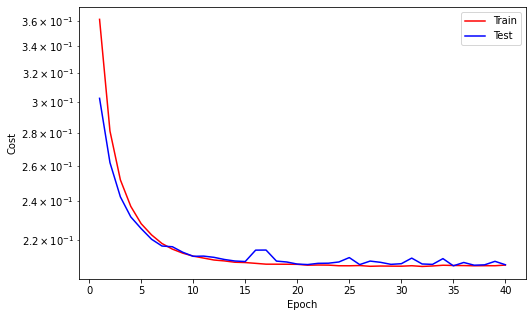

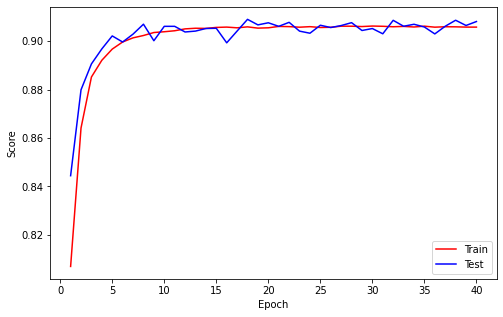

==> EarlyStop patience = 22 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 41 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3590.34it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2078 │ 0.2085 │ │    Type 2    │  0.9434  │
│ Hamming Loss     │ 0.0941 │ 0.0919 │ │ Pre-Diabetes │  0.8766  │
│ Subset Accuracy  │ 0.8411 │ 0.8444 │ │ No Diabetes  │  0.9044  │
│ Micro F1         │ 0.8569 │ 0.8599 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7872 │ 0.7891 │                            
│ Overall Accuracy │ 0.9059 │ 0.9082 │                            
└──────────────────┴────────┴────────┘


Epoch    41
Train_cost  = 0.2078 | Test_cost  = 0.2085 | Train_score = 0.9059 | Test_score = 0.9082 |
==> EarlyStop patience = 23 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 42 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3586.23it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2080 │ 0.2096 │ │    Type 2    │  0.9434  │
│ Hamming Loss     │ 0.0942 │ 0.0969 │ │ Pre-Diabetes │  0.8685  │
│ Subset Accuracy  │ 0.8412 │ 0.8382 │ │ No Diabetes  │  0.8974  │
│ Micro F1         │ 0.8567 │ 0.8525 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7865 │ 0.7823 │                            
│ Overall Accuracy │ 0.9058 │ 0.9031 │                            
└──────────────────┴────────┴────────┘


Epoch    42
Train_cost  = 0.2080 | Test_cost  = 0.2096 | Train_score = 0.9058 | Test_score = 0.9031 |
==> EarlyStop patience = 24 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 43 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3605.71it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2079 │ 0.2085 │ │    Type 2    │  0.9435  │
│ Hamming Loss     │ 0.0941 │ 0.0965 │ │ Pre-Diabetes │  0.8685  │
│ Subset Accuracy  │ 0.8411 │ 0.8428 │ │ No Diabetes  │  0.8985  │
│ Micro F1         │ 0.8568 │ 0.8539 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7849 │ 0.7888 │                            
│ Overall Accuracy │ 0.9059 │ 0.9035 │                            
└──────────────────┴────────┴────────┘


Epoch    43
Train_cost  = 0.2079 | Test_cost  = 0.2085 | Train_score = 0.9059 | Test_score = 0.9035 |
==> EarlyStop patience = 25 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 44 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3454.02it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2082 │ 0.2086 │ │    Type 2    │  0.9436  │
│ Hamming Loss     │ 0.0941 │ 0.0956 │ │ Pre-Diabetes │  0.8709  │
│ Subset Accuracy  │ 0.8412 │ 0.8379 │ │ No Diabetes  │  0.8986  │
│ Micro F1         │ 0.8570 │ 0.8542 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7867 │ 0.7811 │                            
│ Overall Accuracy │ 0.9059 │ 0.9044 │                            
└──────────────────┴────────┴────────┘


Epoch    44
Train_cost  = 0.2082 | Test_cost  = 0.2086 | Train_score = 0.9059 | Test_score = 0.9044 |
==> EarlyStop patience = 26 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 45 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3533.36it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2081 │ 0.2088 │ │    Type 2    │  0.9432  │
│ Hamming Loss     │ 0.0942 │ 0.0924 │ │ Pre-Diabetes │  0.8754  │
│ Subset Accuracy  │ 0.8420 │ 0.8468 │ │ No Diabetes  │  0.9042  │
│ Micro F1         │ 0.8569 │ 0.8597 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7868 │ 0.7942 │                            
│ Overall Accuracy │ 0.9058 │ 0.9076 │                            
└──────────────────┴────────┴────────┘


Epoch    45
Train_cost  = 0.2081 | Test_cost  = 0.2088 | Train_score = 0.9058 | Test_score = 0.9076 |
==> EarlyStop patience = 27 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 46 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3590.34it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2082 │ 0.2086 │ │    Type 2    │  0.9439  │
│ Hamming Loss     │ 0.0940 │ 0.0944 │ │ Pre-Diabetes │  0.8727  │
│ Subset Accuracy  │ 0.8419 │ 0.8387 │ │ No Diabetes  │  0.9002  │
│ Micro F1         │ 0.8572 │ 0.8558 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7877 │ 0.7872 │                            
│ Overall Accuracy │ 0.9060 │ 0.9056 │                            
└──────────────────┴────────┴────────┘


Epoch    46
Train_cost  = 0.2082 | Test_cost  = 0.2086 | Train_score = 0.9060 | Test_score = 0.9056 |
==> EarlyStop patience = 28 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 47 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3610.17it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2083 │ 0.2132 │ │    Type 2    │  0.9440  │
│ Hamming Loss     │ 0.0944 │ 0.0994 │ │ Pre-Diabetes │  0.8647  │
│ Subset Accuracy  │ 0.8416 │ 0.8317 │ │ No Diabetes  │  0.8931  │
│ Micro F1         │ 0.8565 │ 0.8482 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7868 │ 0.7766 │                            
│ Overall Accuracy │ 0.9056 │ 0.9006 │                            
└──────────────────┴────────┴────────┘


Epoch    47
Train_cost  = 0.2083 | Test_cost  = 0.2132 | Train_score = 0.9056 | Test_score = 0.9006 |
==> EarlyStop patience = 29 | Best test_score: 0.9091


─────────────────────────────────────────────────── 🚀 EPOCH 48 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3369.42it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2082 │ 0.2079 │ │    Type 2    │  0.9435  │
│ Hamming Loss     │ 0.0945 │ 0.0927 │ │ Pre-Diabetes │  0.8751  │
│ Subset Accuracy  │ 0.8407 │ 0.8450 │ │ No Diabetes  │  0.9034  │
│ Micro F1         │ 0.8564 │ 0.8591 │ └──────────────┴──────────┘
│ Macro F1         │ 0.7860 │ 0.7902 │                            
│ Overall Accuracy │ 0.9055 │ 0.9073 │                            
└──────────────────┴────────┴────────┘


Epoch    48
Train_cost  = 0.2082 | Test_cost  = 0.2079 | Train_score = 0.9055 | Test_score = 0.9073 |
==> EarlyStop patience = 30 | Best test_score: 0.9091
==> Execute Early Stopping at epoch: 48 | Best test_score: 0.9091
==> Best model is saved at multi-label-clasification/one-d/diabetes_dataset/


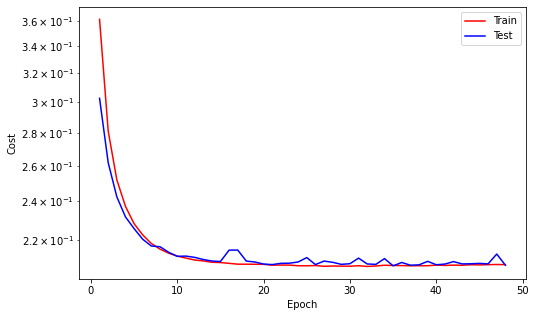

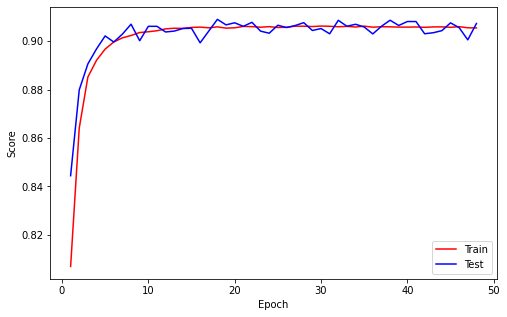

⏹️ Training dihentikan oleh early stopping.

In [80]:
from train_and_evaluate import train_and_evaluate_multi_label

train_and_evaluate_multi_label(
    model=model,
    train_dataset=train_dataset,
    test_dataset=test_dataset,
    train_loader=train_loader,
    test_loader=test_loader,
    criterion=criterion,
    optim=optim,
    config=config,
    device=device,
    labels=labels,          
    callback=callback
)

# Evaluate

In [86]:
from evaluate import evaluate_multi_label

hsl = evaluate_multi_label(model, test_loader, target_cols,criterion, device, config.threshold)

       📊 Evaluasi Model            🎯 Per-Label Accuracy    
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Metrik              ┃  Nilai ┃ ┃     Label      ┃ Akurasi ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ 🔹 Overall Accuracy │ 0.9091 │ │ y_no_diabetes  │ 0.9441  │
│ ✅ Subset  Accuracy │ 0.8456 │ │ y_pre-diabetes │ 0.8774  │
│ 💥 Loss (avg)       │ 0.2099 │ │    y_type_2    │ 0.9056  │
│ 📉 Hamming Loss     │ 0.0910 │ └────────────────┴─────────┘
│ ⚖️  Micro F1-score   │ 0.8615 │                             
│ 📈 Macro F1-score   │ 0.7909 │                             
└─────────────────────┴────────┘

In [82]:
hsl['df'].head(100)

,Target,Prediksi,Benar (%)
0,"[1.0, 0.0, 0.0]","[0.0, 1.0, 0.0]",33.333333
1,"[0.0, 0.0, 1.0]","[0.0, 0.0, 1.0]",100.000000
2,"[0.0, 1.0, 0.0]","[0.0, 1.0, 0.0]",100.000000
3,"[0.0, 1.0, 0.0]","[0.0, 1.0, 0.0]",100.000000
4,"[0.0, 0.0, 1.0]","[0.0, 0.0, 0.0]",66.666667
...,...,...,...
95,"[0.0, 1.0, 0.0]","[0.0, 1.0, 0.0]",100.000000
96,"[0.0, 0.0, 1.0]","[0.0, 0.0, 1.0]",100.000000
97,"[0.0, 0.0, 1.0]","[0.0, 0.0, 1.0]",100.000000
98,"[0.0, 1.0, 0.0]","[0.0, 1.0, 0.0]",100.000000


# Pengaplikasian

In [83]:
#!pip install ipywidgets
#!jupyter nbextension enable --py widgetsnbextension

In [84]:
import torch, json
from torch import optim, nn
from class_lib import MultiLabel1DClassifier
import joblib
import pandas as pd


# Load Config
config = torch.load(root_folder + "configs.pth", map_location="cpu", weights_only=False)
#config = torch.load(root_folder + "configs.pth", map_location="cpu")

#Load Weights
weights= torch.load(root_folder + "weights_best.pth", map_location="cpu")

#Load Label Mapping
with open(root_folder + "label_mappings.json", "r") as f:
    label_mapping = json.load(f)


model = MultiLabel1DClassifier(input_dim=config.input_dim, hidden_dims=config.hidden_dims, output_dim=config.output_dim, dropout=config.dropout, activation=config.activation)
model.load_state_dict(weights)
model.eval() 

MultiLabel1DClassifier(
  (model): Sequential(
    (0): Linear(in_features=6, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=64, out_features=3, bias=True)
    (4): Sigmoid()
  )
)

In [85]:
from aplokator import MultiLabelPredictor
predictor = MultiLabelPredictor(
    model=model,
    config=config,
    label_mapping=label_mapping,
    scaler_folder=root_folder,
)

HTML(value='\n        <style>\n        .minimal-container { background: #f8f9fa; padding: 12px; border-radius:…